# Assignment 8
## Object Oriented Programming
### Maximum grade: 55 / 43

The purpose of this lab is to:
* Error handling
* Practice extending existing classes
* Implement basic operators for classes such as +, -, `__getitem__` and *
* Create your own custom classes and exceptions

In [1]:
def tester(a, b=True):
    """
    I am the function that tells you if you pass or fail tests.
    Run me, please.
    """
    return "You Passed!" if a == b else "You Failed!"

## Practice Question: Blackjack

Write a program that draws cards from a deck, and simulates a game of blackjack.

First, create a class representing a card by filling in the template below. For the value method, Jacks are 11, Queens are 12, and Kings are 13, and aces should be returned as 1 -- whether or not an ace is high (14) or low (1) can be decided by the program that is "playing" blackjack later.

In [ ]:
class Card:
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
        
    def value(self):
        faces = {
            "J": 11,
            "Q": 12,
            "K": 13,
            "A": 1
        }
        if self.face in faces:
            return faces[self.face]
        else:
            return self.face


In [ ]:
c1 = Card("Spades", 3)
c2 = Card("Hearts", "K")
c3 = Card("Diamonds", "A")
print("Pactice Question #1 Test Case #1:", tester(c1.value(), 3))
print("Pactice Question #1 Test Case #2:", tester(c2.value(), 13))
print("Pactice Question #1 Test Case #3:", tester(c3.value(), 1))

Now, create a `Deck` class that consists of 52 cards by filling in the template below. Represent the suit of cards as a string: `("Spades", "Diamonds", "Hearts", "Clubs")` and the face of cards as a single character or integer: `[2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K", "A"]`

In [ ]:
import random

class Deck:
    def __init__(self):
        self.suits = ["Spades", "Diamonds", "Hearts", "Clubs"]
        
        self.removedCards = []
        
        faces = {
            11 : "J",
            12 : "Q",
            13 : "K",
            1  : "A"
        }
        self.cards = []
        for i in self.suits :
            for x in range (1, 14) :
                if x in faces:
                    self.cards.append(Card(i, faces[x]))
                else:
                    self.cards.append(Card(i, x))
            
    def draw(self):
        self.removedCards.append(self.cards[0])
        del self.cards[0]
        return self.removedCards[-1]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def reshuffle(self):
        self.cards.extend(self.removedCards)
        self.removedCards.clear()


In [ ]:
d = Deck()
card = d.draw()
print(card.suit)
print(card.face)
print(card.value()) # Pay attention to the brackets here. value() is a method, so we need to call it like one
d.shuffle()
card = d.draw()
print(card.suit)
print(card.face)
print(card.value()) # Pay attention to the brackets here. value() is a method, so we need to call it like one

The following function returns the value of a hand (as a list of `Card` objects) in blackjack:

In [ ]:
def value(hand):
    val = 0
    num_aces = 0
    for card in hand:
        this_val = card.value()
        if this_val != 1:
            val += this_val
        else:
            num_aces += 1
    while num_aces > 0:
        if val + 11 > 21:
            val += 1
        else:
            val += 11
        num_aces -= 1
    return val

## Question 1a: Extending Geometric Shapes (6 points)

Add the method `area` to the classes `Line` and `Rectangle` that returns the area of the given shapes. The area of a line is always `0`.

In [4]:
class Shape:
    def setOrigin(self, x, y):
        self.x, self.y = x, y
        
    def move(self, dx, dy):
        """Move by dx and dy"""
        self.x, self.y = self.x + dx, self.y + dy

class Line(Shape):
    def __init__(self, x, y, u, v):
        """Line with start point (x, y) and end point (u, v)"""
        Shape.setOrigin(self, x, y)
        self.u, self.v = u, v
        
    def move(self, dx, dy):
        Shape.move(self, dx, dy)
        self.u, self.v = self.u + dx, self.v + dy
        
    def area(self):
        return 0
    
    def __str__(self):
        return "Line from (" + str(self.x) + ", " + str(self.y) + \
               ") to (" + str(self.u) + ", " + str(self.v) + ")"

class Rectangle(Shape):
    def __init__(self, x, y, w, h):
        """Rectangle at (x, y) with width w and height h"""
        Shape.setOrigin(self, x, y)
        self.w, self.h = w, h
        
    def area(self):
        return abs(self.w * self.h)
        
    def __str__(self):
        return "Rectangle at (" + str(self.x) + ", " + str(self.y) + \
               "), width " + str(self.w) + ", height " + str(self.h)
    


In [5]:
r = Rectangle(-2, -3, 2, 3)
print("Question #1a Test Case #1:", tester(str(r), "Rectangle at (-2, -3), width 2, height 3"))
print("Question #1a Test Case #2:", tester(r.area(), 6))
l = Line(1, 2, 5, 6)
print("Question #1a Test Case #3:", tester(str(l), "Line from (1, 2) to (5, 6)"))
print("Question #1a Test Case #4:", tester(l.area(), 0))

Question #1a Test Case #1: You Passed!
Question #1a Test Case #2: You Passed!
Question #1a Test Case #3: You Passed!
Question #1a Test Case #4: You Passed!


In [ ]:
# Hidden test for 1a

In [ ]:
# Hidden test for 1a

## Question 1b: Groups of Shapes (6 points)

The class below represents a group of shapes. For instance, a group could be a square, a rectangle, and a triangle. 

- Implement the `area` method for the `Group` class.
    - The area of a group is just the total area of the shapes in the group. For the purpose of this assignment, we will not consider cases where shapes overlap, you simply need to add the areas of the shapes in a group independently.
- Implement the `move` method for the `Group` class.
    - Take everything inside the group, and move it by the given `dx` and `dy`. For the purpose of this assignment, you can assume every shape in the group can be moved.


**Note:** You cannot assume what the shape is. It might be a rectangle, it might be a Triangle, it might be the 2D representation of Mark himself. What you can assume is that they will all be of the Shape Class.

In [6]:
class Group:
    def __init__(self):
        """
        This constructor has been done for you
        """
        self.c = set() 
        
    def add(self, s):
        """
        Add shape s to group
        """
        self.c.add(s)
        
    def __str__(self):
        """
        Note from Mark:
        Don't touch this.
        """
        r = "Group with:"
        for s in self.c:
            r = r + "\n\t" + str(s)
        return r
    
    def move(self, dx, dy):
        """
        Move by dx and dy
        """
        for x in self.c:
            x.move(dx, dy)
    
    def area(self):
        """
        Calculate the area of every shape in the group and sum them
        """
        sum_group = 0
        for x in self.c:
            sum_group += x.area()
            
        return abs(sum_group)

The following cell should create a new group, and add both our line and rectangle from above to it. The output should look like:
```
Group with:
    Rectangle at (-2, -3), width 2, height 3
    Line from (1, 2) to (5, 6)
```

In [7]:
r = Rectangle(-2, -3, 2, 3)
l = Line(1, 2, 5, 6)
g1 = Group()
g1.add(l)
g1.add(r)
print(str(g1))
print("Question #1b Test Case #1:", tester(g1.area(), 6))

Group with:
	Line from (1, 2) to (5, 6)
	Rectangle at (-2, -3), width 2, height 3
Question #1b Test Case #1: You Passed!


Now, if we move every element in the group up one unit and to the right one unit, the output should look like:
```
Group with:
    Rectangle at (-1, -2), width 2, height 3
    Line from (2, 3) to (6, 7)
```

In [8]:
g1.move(1, 1)
print(g1)

Group with:
	Line from (2, 3) to (6, 7)
	Rectangle at (-1, -2), width 2, height 3


In [ ]:
# Hidden test for 1b

In [ ]:
# Hidden test for 1b

## Question 1c: Creating New Shapes (12 points)

Create two new shapes: `Circle` and `Polygon`. Classes `Circle` and `Polygon` should inherit from `Shape`. 

- `Circle` 
    - A `Circle` is created in the same way your standard `Shape` is created, but instead of a height and width, it simply has a radius called `r`.
    - The area of a `Circle` is a formula you all know by now. It will help to import the `math` library so that way you have access to `pi`!
    - The `__str__()` method should look similar to a Rectangle as well, formatted like so:
        - `"Circle at (x, y), radius r"`
- `Polygon`
    - A `Polygon` is created in a more unique way, as seen by the test cases. A Polygon doesn't have an origin `x` and `y`, but instead a list of points. However, `Shape`s have origins, so we will need to set the origin of the `Polygon` to be the first coordinate of the list of coordinates.
    - The area of a non-self-intersecting polygon with $n$ vertices is defined as follows:
        - > $A = {1 \over 2} \sum_{i=0}^{n-1}(x_i y_{i+1}-x_{i+1} y_i)$ 
        - where each $x_i$, $y_i$ represents a vertex (“corner”) of a polygon and where $x_n = x_0$ and $y_n = y_0$. 
        - Note that the area of a convex polygon is positive if the points are in counterclockwise order and negative if they are in clockwise order. _(The Wikipedia page takes the absolute value to avoid negative areas. Don’t do this here.)_
    - The `__str__()` method is a simple string, simply being:
        - `"Polygon with " + str(l)` where `l` is the list of coordinates.



In [9]:
import math

# Create classes Circle and Polygon here
class Circle(Shape):
    def __init__(self, x, y, r):
        """Circle at (x, y), radius r"""
        Shape.setOrigin(self, x, y)
        self.r = r
        
    def area(self):
        return abs(math.pi * (self.r**2))
        
    def __str__(self):
        return "Circle at (" + str(self.x) + ", " + str(self.y) + \
               "), radius " + str(self.r)
    
class Polygon(Shape):
    def __init__(self, l):
        self.l = l
        
        """Polygon at (x, y)"""
        Shape.setOrigin(self, self.l[0][0], self.l[0][1])
        
    def area(self):
        A1 = 0
        A2 = 0
        
        for i in range(len(self.l)-1):
            A1 += self.l[i][0] * self.l[i+1][1]
            A2 += self.l[i+1][0] * self.l[i][1]
        return abs(A1 - A2)/2
    
    def __str__(self):
        return "Polygon with " + str(self.l)


In [10]:
# This test case is deceptive. You may have mistakes that it won't find :D
g2 = Group()
p = Polygon([(0, 0), (4, 0), (2, 2), (4, 4), (0, 4), (2, 2)])
c = Circle(1, -5, 1)
g2.add(p)
g2.add(c)
print("Question #1c Test Case #1:", tester(str(c), "Circle at (1, -5), radius 1"))
print("Question #1c Test Case #2:", tester(str(p), "Polygon with [(0, 0), (4, 0), (2, 2), (4, 4), (0, 4), (2, 2)]"))
print("Question #1c Test Case #3:", tester(c.area(), 3.141592653589793))
print("Question #1c Test Case #4:", tester(p.area(), 8.0))
print("Question #1c Test Case #5:", tester(round(g2.area(), 3), 11.142))

Question #1c Test Case #1: You Passed!
Question #1c Test Case #2: You Passed!
Question #1c Test Case #3: You Passed!
Question #1c Test Case #4: You Passed!
Question #1c Test Case #5: You Passed!


In [ ]:
# Hidden test for 1c

In [ ]:
# Hidden test for 1c

In [ ]:
# Hidden test for 1c

In [ ]:
# Hidden test for 1c

## Question 2: Defining Vectors (21 points)
Define class `Vector` for n-dimensional vectors as follows:
- `Vector(l)`: Creates a new vector with dimension `len(l)` from list `l` of numbers; raises `TypeError` if `l` is not a list or not all of its elements are of type `int` or `float`.
- `v.dim()`: Returns the dimension (length) of the vector.
- `v. __getitem__(i)`: Returns the `i`-th component of the vector, **where components are indexed starting from `1`**; raises `IndexError` if `i` is less than `1` or greater than the dimension of the vector.
- `v. __setitem__(i, x)`: Sets the `i`-th component of vector `v` to `x`, where components are indexed starting from `1`; raises `IndexError` if `i` is less than `1` or greater than the dimension of the vector.
- `v.__str__()`: Returns a string with a readable representation of the vector, see the example below.
- `v. __add__(other)`: Returns a new vector that is the component-wise sum of `v` and other; raises `ValueError` if `other` is not of type `Vector` or if `other` is of a different dimension.
- `v.__mul__(other)`: If `other` is of type `int` or `float`, returns a new vector resulting from the scalar multiplication of `v` with `other`, , i.e. with each component of `v` multiplied by scalar. If `other` is of type `Vector`, returns the dot product of `v` and `other`, which is the sum of the products of the corresponding components; raises `ValueError` if `other` is of different dimension in this case. If the type of `other` is none of `Vector`, `int`, `float`, raises `AssertionError`.  
- `v.__rmul__(other)`: Defined exactly like `v.__mul__(other)`

Python uses following equivalent notations:

    v[i]       =  v.__getitem__(i)
    v[i] = x   =  v.__setitem__(i, x)
    str(v)     =  v.__str__()
    v + other  =  v.__add__(other)
    v * other  =  v.__mul__(other)
    other * v  =  v.__rmul__(other)   if other.__mul__(v) is not defined 

In [11]:
class Vector():
    def listCheck(self, i):
        if (type(i) != list) or not all(isinstance(x, (int, float)) for x in i):
            raise TypeError("Stop giving bad values! I did not become a piece of memory for this!")
    
    def __init__(self, l):
        self.listCheck(l)
        self.l = l
    
    def dim(self):
        return len(self.l)
    
    #all the different checks we need
    def typeCheck(self, i):
        if type(i) not in (int, float):
            raise TypeError("Stop giving bad values! I did not become a piece of memory for this!")
    def vectorCheck(self, i):
        if (type(i) != Vector) or (len(self.l) != i.dim()):
            raise ValueError("Do better!")
    def indexCheck(self, i):
        if (i > len(self.l)+1) or (i < 1):
            raise IndexError("What are you doing to me? Too much or too little?")
        
        
    def __str__(self):
        return f"Vector: {self.l}"
    def __getitem__(self, i):
        self.typeCheck(i)
        self.indexCheck(i)
        return self.l[i-1]
    def __setitem__(self, i, x):
        self.typeCheck(i)
        self.indexCheck(i)
        self.l[i-1] = x
    
    
    
    
    def __add__(self, other):
        self.vectorCheck(other)
        return Vector([sum(x) for x in zip(self.l, other.l)])
    
    def __mul__(self, other):
        if type(other) in (int, float):
            newValue = [x * other for x in self.l]
        else:
            if type(other) not in (Vector, int, float):
                raise AssertionError("This is a doozy")
            self.vectorCheck(other)
            newValue = [x[0] * x[1] for x in zip(self.l, other.l)] 
        return Vector(newValue)
    
    __rmul__ = __mul__

In [12]:
v1 = Vector([2, 3, 4])
v2 = Vector([1, 2, 2])
v2[3] = 3
print("Question #2 Test Case #1:", tester(v1[1], 2))
print("Question #2 Test Case #2:", tester(v1.dim(), 3))
print("Question #2 Test Case #3:", tester(v1[2], 3))
print("Question #2 Test Case #4:", tester(v2.dim(), 3))
print("Question #2 Test Case #5:", tester(str(v2), 'Vector: [1, 2, 3]'))
print("Question #2 Test Case #6:", tester(str(v1 + v2), 'Vector: [3, 5, 7]'))
print("Question #2 Test Case #7:", tester(str(v2 * 2), 'Vector: [2, 4, 6]'))
print("Question #2 Test Case #8:", tester(str(2 * (v1 + v2)), 'Vector: [6, 10, 14]'))

Question #2 Test Case #1: You Passed!
Question #2 Test Case #2: You Passed!
Question #2 Test Case #3: You Passed!
Question #2 Test Case #4: You Passed!
Question #2 Test Case #5: You Passed!
Question #2 Test Case #6: You Passed!
Question #2 Test Case #7: You Passed!
Question #2 Test Case #8: You Passed!


All the following raise exceptions:
(remember, these are supposed to be *mathematical* vectors so we are starting indexing from 1, not 0.

In [13]:
try:
    v1[0] # raises IndexError
    print("Question #2 Test Case #9: You Failed!")
except IndexError:
    print("Question #2 Test Case #9: You Passed!")
try:
    v2 + [9] # raises ValueError
    print("Question #2 Test Case #10: You Failed!")
except ValueError:
    print("Question #2 Test Case #10: You Passed!")
try:
    v3 = Vector([1, 'cat', 3]) # Raises TypeError
    print("Question #2 Test Case #11: You Failed!")
except TypeError:
    print("Question #2 Test Case #11: You Passed!")

Question #2 Test Case #9: You Passed!
Question #2 Test Case #10: You Passed!
Question #2 Test Case #11: You Passed!


In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

In [ ]:
# Hidden test for Vector

## Big Bonus: Checkers (12 points) 

A checkers board starts out in the following configuration.

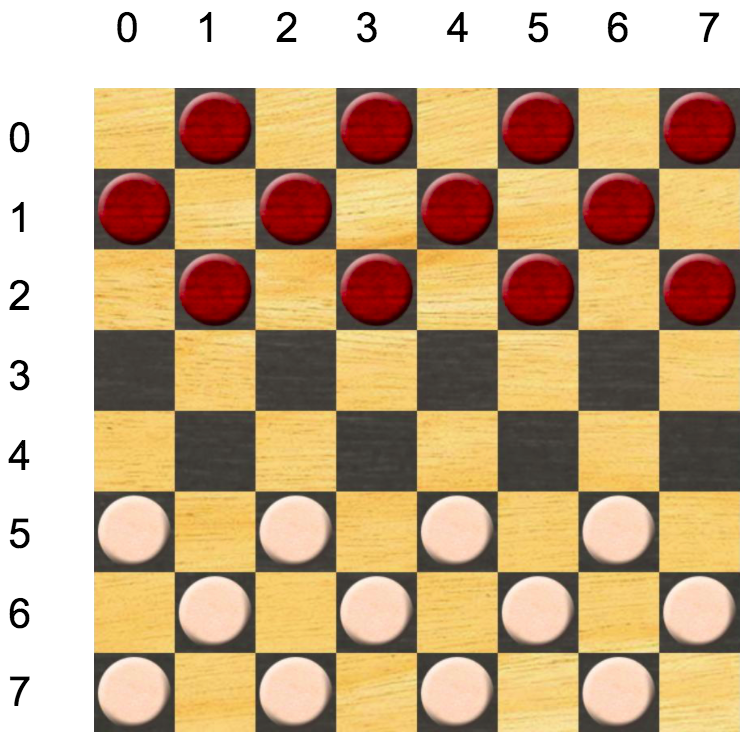

Players take turns, moving one playing piece (checker) at a time according to the rules below.  The game ends when one player has no checkers left. The player with checkers remaining is the victor.   

Rules for moving checkers:
- A checker may only move ahead diagonally to the right or left, unless jumping another checker.
    - "Ahead" means up for white, and down for red on the board pictured above
   
- A checker may "jump" an opponent's checker if the opponent is in one of the spots the checker could ordinarily move to (ahead to the right or left).  
    - The checker may "jump" the opponent by moving two spaces diagonally in a straight line, so long as the space it would land in is unoccupied.
    - Once a jump has been performed, that checker has the opportunity to jump another piece, if it has the ability to do so.  
        - This may continue for as many jumps as are possible
        - A checker which is not a king (see below) may not jump backwards, even in a chain of jumps (English Rules!)
    - Any checkers which have been jumped are removed from the board, or "captured."
        - It is only through jumping all of your opponents checkers that a game may be won.  
- If a checker reaches the other side of the board, it is "kinged".  This playing piece may now move in any of the four diagonal directions.
    - Reaching the end of the board immediately stops a chain of jumps
    - A king may jump in any direction as well.  
    
In some version of this game, if one of your pieces can jump the opponent, you are forced to make that move.  To keep things simple, we will not be implementing this rule, though your professor thinks it's a good rule:
- It improves the strategy by advantaging players who think several turns ahead.
- Checkers games can have a tendency towards players mirroring each other and playing highly defensively.  This slows the game considerably, and can even make it boring.  Being able to sacrifice a piece to force a jump and break your opponent's fortifications makes it much more interesting in my opinion.

But anyway, on to the question.

You have been provided with two things:
- A string conversion method within a `CheckersGame` class which prints out the current state of a checkers game.
- A `runGame` script which prompts the user for inputs, and feeds those inputs into the CheckersGame class.  It's an interactive game of checkers!   

These functions will help you to test and run your program. You are responsible for creating the rest of this algorithm.  

### Initialization (1 point)
The initializer shall take no arguments other than self and create three fields:
- `board`
    - An 8x8 two-dimensional list, initialized to the above starting position for a checkers board.  The board will contain integer values, corresponding to the various things that can occupy spaces on the board.  
        - 0 -> empty space
        - 1 -> white checker
        - 2 -> red checker
        - 3 -> white king
        - 4 -> red king
- `whoseMove`
    - keeps track of whose turn it is to move. Initializes to `"white"`
- `isWon`
    - keeps track of whether the game has been won or not.  If the game has been won, this field will either `"red"` or `"white"`, depending on who has won.

### Methods 
In addition, you will need the following methods.

- `parseMove()` (prof's solution: 10 lines of code) (1.5 points)
    - The user will input moves to a command line interface in the following form: 
        - "YX YX ..."
    - Y and X are numbers between 0 and 7, which correspond to co-ordinates on the game board.
    - The first coordinate entered is the coordinate of the piece you wish to move.
    - The second is where you wish to move it to.  
    - This function must return a list of tuples.  
        - Each tuple must be of length two.
        - The first element is the **row (Y)**
        - The second element is the **column (X)**
    - This string may have many coordinates (for when jumping multiple pieces).
    - If for any reason the string provided is not a valid set of coordinates (out of range, no spaces, etc.), raise a ValueError.
    - There are some test cases below.  


- `checkWinner()` (prof's solution: 14 lines of code) (1 points)
    - Red wins if there are no white pieces remaining. 
    - White wins if there are no red pieces remaining.
    - This method updates the `isWon` attribute accordingly.


- `changeTurn()` (prof's solution: 12 lines of code, but you could get away with 5) (0.5 point)
    - If it's currently Red's turn, change to White, and vice versa.
    - If you decided to keep any extra data relating to the following, it should be updated:
        - Which board values are currently active
        - Which board values are currently enemies
        - Which direction pieces are travelling on the board
        - Any other movement related data that you may wish to keep. 

- `move()` (prof's solution: 25 lines of code) (3 points)
    - Given a move, expressed as a string, modify the class attributes to reflect the move encoded in the string.
    - You may assume that the input represents a valid move.
    - The move operation will consist of three things, two of which we have already written methods for:
        - Updating the board
        - Changing whose turn it is
        - Checking to see if the game is won, and updating appropriately. 

- `isValidMove()` (prof's solution: 45 lines of code) (5 points)
    - In this algorithm, we are going to separate the code that checks that a move is valid from the code that actually mutates the state of the board.  
    - Given a move, expressed as a string, return True if this move is a valid move for the player whose turn it is.  
    - Bear in mind that the input is an unparsed string, so you may want to use one of the other methods in your class to parse it *(waggles eyebrows)*.
    - No move is valid on a game that has been won.  

The professor's **recommended approach** is to implement the methods in the order given.  For the larger ones, implement one rule of checkers at a time, testing as you go.  The point of this question is to see if you can decompose a problem into sub-algorithms, and then use them together correctly to achieve a result.  

**NOTE:** If you have a program waiting for input, you have to stop the execution of that cell before recompiling.  The function `runGame` will terminate if it receives an input of `q`.

**NOTE NOTE:** If you do this question in dark mode, red is going to look like white and vice versa. 

**NOTE NOTE NOTE:** The line counts provided above are intended as a guideline only.  You are not required to get your algorithm to be close to or the same as the provided line counts.  They can also be used to roughly estimate the difficulty of the various methods, and help you to plan your time.  

**NOTE NOTE NOTE NOTE:** Split-screen viewing or multiple monitors is also recommended so you can see your question and the code at the same time. You might need to copy the question text into something other than a jupyter notebook if you're doing this on jhub though.  

In [ ]:
### YOUR SOLUTION HERE
class CheckersGame () :
    def __init__ (self) :
        #did it manually so I can visualize it easier
        self.board =  [ [ 0, 2, 0, 2, 0, 2, 0, 2 ]
                      , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
                      , [ 0, 2, 0, 2, 0, 2, 0, 2 ]
                      , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
                      , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
                      , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
                      , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
                      , [ 1, 0, 1, 0, 1, 0, 1, 0 ] ]
        self.whoseMove = "white"
        self.isWon = False
###############################################################################################################################################
    def checkWinner(self) :
        one_list = []
        for x in self.board:
            one_list += x
        #1,3 = white, 2,4 = red
        if (2 not in one_list) and (4 not in one_list):
            self.isWon = "white"
        if (1 not in one_list) and (3 not in one_list):
            self.isWon = "red"
###############################################################################################################################################
    def changeTurn(self) :
        if self.whoseMove == "white":
            self.whoseMove = "red"
        else:
            self.whoseMove = "white"
###############################################################################################################################################
    def parseMove (self, move) :
        move_0 = move.split()
        move_list = []
        for i in move_0:
            if (not i.isdigit()) or (len(i) != 2) or (len(move_0) < 2):
                raise ValueError
            
            x = int(i[0])
            y = int(i[1])
            if (x > 7) or (x < 0) or (y > 7) or (y < 0):
                raise ValueError
            move_list.append( (x, y) )
        return tuple(move_list)
        
 ###############################################################################################################################################       
    def move(self, move) :
        move_list = self.parseMove(move)
        
        for x in range(1,len(move_list)):
            prev = move_list[x-1]
            curr = move_list[x]
            
            #Finds if move has taken a piece
            betweeny = (curr[0] - prev[0])/2
            betweenx = (curr[1] - prev[1])/2
            if (abs(betweeny) == 1) and (abs(betweenx) == 1):  
                self.board[prev[0] + int(betweeny)][prev[1] + int(betweenx)] = 0
                
        start_pos = move_list[0]
        final_pos = move_list[-1]

        piece = self.board[start_pos[0]][start_pos[1]]
        
        #it will change it to whatever it needs it to be regardless
        self.board[start_pos[0]][start_pos[1]] = 0
        if (self.whoseMove == "white") and (final_pos[0] == 0):
            self.board[final_pos[0]][final_pos[1]] = 3
        elif (self.whoseMove == "red") and (final_pos[0] == 7):
            self.board[final_pos[0]][final_pos[1]] = 4
        else:
            self.board[final_pos[0]][final_pos[1]] = piece

        self.changeTurn()
        self.checkWinner()
        

###############################################################################################################################################
    def isValidMove(self, move) : 
        if self.isWon:
            return False
        
        move_list = self.parseMove(move)
        
        #check if king
        move0 = move_list[0]
        piece = self.board[move0[0]][move0[1]]
        
        #invalid piece choices
        if (self.whoseMove == "white") and (piece not in (1,3)):
            return False
        elif (self.whoseMove == "red") and (piece not in (2,4)):
            return False
        elif piece == 0:
            return False
        
        #who are we trying to kill?
        if (self.whoseMove == "white"):
            Target = (2,4)
        else:
            Target = (1,3)

        for x in range(1,len(move_list)):
            prev = move_list[x-1]
            curr = move_list[x]
            
            betweeny = (curr[0] - prev[0])/2
            betweenx = (curr[1] - prev[1])/2
            #check if piece is moving in the right direction
            if ((piece == 1) and (betweeny > 0)):
                return False
            if (piece == 2) and (betweeny < 0):
                return False
            if (betweeny > 1) or (betweenx > 1):
                return False
            #check if moving diagonally
            if (abs(betweeny)) != (abs(betweenx)):
                return False
            #Checks if spaces moved is a kill
            if (abs(betweeny) == 1) and (abs(betweenx) == 1) and (self.board[prev[0] + int(betweeny)][prev[1] + int(betweenx)] not in Target):  
                return False
            #checks if next space is occuipied:
            if (self.board[curr[0]][curr[1]] != 0) and (self.board[curr[0]][curr[1]] != self.board[move_list[0][0]][move_list[0][1]]):
                return False
        return True
                
###############################################################################################################################################                      
### EVERYTHING PAST THIS POINT IS A GIFT: Don't touch until December 25th        
    def __str__ (self) :
        out = "  0 1 2 3 4 5 6 7 \n  ╔═╤═╤═╤═╤═╤═╤═╤═╗\n"
        i = 0
        for row in self.board :
            out += f"{str(i)}║"
            j = 0
            for item in row :
                if item == 0:
                    out += "░" if (i + j) % 2 == 0 else " "
                elif item >= 1 and item <= 4:
                    out += ["○", "●", "♔", "♚"][item-1]
                out += "│"
                j += 1
            out = out[:-1]
            out += f"║{str(i)}\n ╟─┼─┼─┼─┼─┼─┼─┼─╢\n"
            i += 1
        out = out[:-18]
        out += "╚═╧═╧═╧═╧═╧═╧═╧═╝\n  0 1 2 3 4 5 6 7 \n"
        return out
    
def runGame (init = False, moveList = False) :
    game = CheckersGame()

    if (init != False) :
        game.board = init
    
    print("Checkers Initialized...")
    print(game)
    if (moveList != False) :
        print("Move List Detected, executing moves")
        for move in moveList :
            print(f"{game.whoseMove} makes move {move}\n")
            if (move == "q") :
                return
            if (game.isValidMove(move)) :
                game.move(move)
                print(game)
                if (game.isWon != 0) :
                    break
            else :
                print("Invalid Move")    
                
    print("Moves must be typed as coordinates (with no commas or brackets) separated by spaces. Row, then column.")
    print("Example: 54 43")
    print("When performing multiple jumps, enter each co-ordinate your piece will land on in sequence.")
    while (game.isWon == False) :
        print(f"{game.whoseMove} to move")
        move = input(">> ")
        if (move == "q") :
            return
        if (game.isValidMove(move)) :
            game.move(move)
            print(game)
            if (game.isWon != 0) :
                break
        else :
            print("Invalid Move")
    print("The Game is Finished!")
    print(f"Congratulations, {game.isWon}!")

In [ ]:
game = CheckersGame()
print("`parseMove()` Test Cases")
print("Bonus Test Case #1:", tester(game.parseMove("12 34"), ((1, 2), (3, 4))))
try:
    print(game.parseMove("39 99"))
    print("Bonus Test Case #2: You Failed!")
except ValueError:
    print("Bonus Test Case #2: You Passed!")
print("Bonus Test Case #3:", tester(game.parseMove("77 66 55 44 33 22 11 00"), ((7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0))))

game.changeTurn()
print("`changeTurn()` test cases")

print("Bonus Test Case #4:", tester(game.whoseMove, "red"))
game.changeTurn()
print("Bonus Test Case #5:", tester(game.whoseMove, "white"))

print("`checkWinner()` test cases") 
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]  
game.checkWinner()
print("Bonus Test Case #6:", tester(game.isWon, "white"))
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 4, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              ]  
game.checkWinner()
print("Bonus Test Case #7:", tester(game.isWon, "red"))

In [ ]:
# You can begin manually checking behaviour using the following scenario (or the default one)
# Here are some example commands you might use, testing a jump and a triple jump.
# 63 45
# 65 43 25 03
test_board  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 2, 0, 0, 0, 2 ]
              , [ 0, 0, 0, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 2, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]   

test_boar2  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 0, 0, 0, 0, 2 ]
              , [ 0, 0, 2, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 1, 0, 1, 0, 0 ]
              , [ 1, 0, 0, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 0, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ] 

runGame(test_boar2)

In [ ]:
# The following is an entire game of checkers, which tests various edge cases.  
# There are some invalid commands in this one as well.  
# If your code works on this one, it'll probably do fine on the test cases.
# The test cases have not been selected from this game, so I can't say 100%
# But this is an extremely strong test of robustness.  

# The full output for this (to compare to your result) has been stored in "checkersgame.txt"

# You can run this game up to a certain move number by slicing the list of moves...

moves = [ '50 41'
, '23 32'
, '41 23'
, '12 34'
, '52 41'
, '21 32'
, '41 30'
, '41 52'
, '34 43'
, '56 47'
, '43 52'
, '61 43 21' # double jump
, '10 32'
, '30 21'
, '25 36'
, '21 10'
, '01 13'
, '01 12'
, '10 01'
, '14 25'
, '01 23 41' # w.king double jumps backward
, '41 32'
, '25 34'
, '41 32'
, '34 43'
, '32 21'
, '43 52'
, '72 61'
, '05 14'
, '61 50'
, '52 43'
, '52 61'
, '54 43'
, '61 72' # red gets kinged 
, '70 61'
, '36 47'
, '36 45'
, '50 41'
, '72 50 32 54 72' # round the world! Red king jumps 4, lands back in the place he started.  
, '65 54'
, '16 25'
, '21 12'
, '14 23'
, '54 36 14 32' # This is an invalid move, the final jump is backwards and therefore disallowed.  
, '54 36 14' # This is fine though.
, '72 63'
, '74 52'
, '07 16'
, '14 05'
, '27 36'
, '05 27 45'
, '03 14'
, '76 65'
, '14 25'
, '12 34 61'
, '12 34 16'
]
runGame(moveList = moves)

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test


In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

In [ ]:
# Hidden Test